# Datasets Test

Test the various kind of data sets that come with TensorTools.

*Remarks: The order of the image outputs can change between single executions!*

In [1]:
# Force matplotlib to use inline rendering
%matplotlib inline

import os
import sys
import time

# add path to libraries for ipython
sys.path.append(os.path.expanduser("~/libs"))

import cv2
import numpy as np
import tensorflow as tf
import tensortools as tt

DATA_ROOT = "/work/sauterme/data"

## MNIST

In [ ]:
mnist_train = tt.datasets.mnist.MNISTTrainDataset(DATA_ROOT)
mnist_valid = tt.datasets.mnist.MNISTValidDataset(DATA_ROOT)
mnist_test = tt.datasets.mnist.MNISTTestDataset(DATA_ROOT)

In [ ]:
def display_mnist(dataset):
    x, y = dataset.get_batch(1)
    tt.visualization.display_array(x[0] * 255)
    print('Label: {}'.format(y))
    
display_mnist(mnist_train)
display_mnist(mnist_valid)
display_mnist(mnist_test)

## MovingMNIST

In [ ]:
SEQ_LEN = 5
moving_train = tt.datasets.moving_mnist.MovingMNISTTrainDataset(
    DATA_ROOT, input_shape=[SEQ_LEN,64,64,1], target_shape=[SEQ_LEN,64,64,1])
moving_valid = tt.datasets.moving_mnist.MovingMNISTValidDataset(
    DATA_ROOT, input_shape=[SEQ_LEN,64,64,1], target_shape=[SEQ_LEN,64,64,1])
moving_test = tt.datasets.moving_mnist.MovingMNISTTestDataset(
    DATA_ROOT, input_seq_length=SEQ_LEN, target_seq_length=SEQ_LEN)

In [ ]:
def display_moving(dataset, title):
    x, y = dataset.get_batch(1)
    full_seq = np.concatenate((x[0], y[0]))
    tt.visualization.display_batch(full_seq * 255, nrows=2, ncols=5, title=title)
    
display_moving(moving_train, 'Train')
display_moving(moving_valid, 'Validation')
display_moving(moving_test, 'Test')

## UCF11

*Remarks: This example uses an input queue.*

In [2]:
ucf11_train = tt.datasets.ucf11.UCF11TrainDataset(DATA_ROOT,
                                                  input_seq_length=3, target_seq_length=3,
                                                  image_scale_factor=0.5, gray_scale=False,
                                                  min_examples_in_queue=128, queue_capacitiy=256,
                                                  num_threads=16, do_distortion=False,
                                                  crop_size=None)
ucf11_valid = tt.datasets.ucf11.UCF11ValidDataset(DATA_ROOT,
                                                  input_seq_length=3, target_seq_length=3,
                                                  image_scale_factor=0.5, gray_scale=False,
                                                  crop_size=None)

File UCF11_updated_mpg.rar has already been downloaded.
File UCF11_updated_mpg.rar has already been extracted.
Found 8726 serialized frame sequences. Skipping serialization.
File UCF11_updated_mpg.rar has already been downloaded.
File UCF11_updated_mpg.rar has already been extracted.
Found 8726 serialized frame sequences. Skipping serialization.


Starting queue runners...
x-range: [0.0, 1.0], y-range: [0.0, 1.0]
(120, 160, 3)
x-range: [0.0, 1.0], y-range: [0.0, 1.0]
(120, 160, 3)


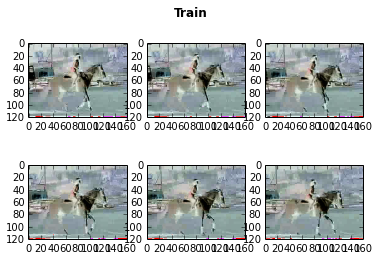

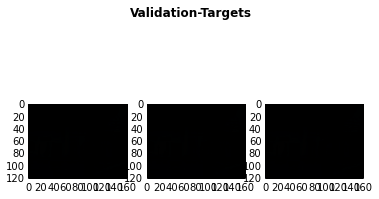

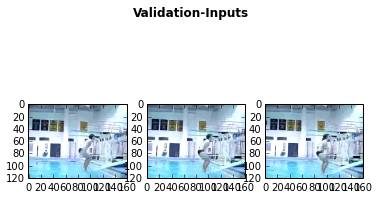

In [7]:
batch_x, batch_y = ucf11_train.get_batch(32)

with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    try:
        print('Starting queue runners...')
        x, y = sess.run([batch_x, batch_y])       
    except tf.errors.OutOfRangeError:
        print("Done training -- epoch limit reached")
    finally:
        # When done, ask the threads to stop
        coord.request_stop()

    coord.join(threads)
    
def display_ucf11_queue(x, y, title):
    print("x-range: [{}, {}], y-range: [{}, {}]".format(x.min(), x.max(), y.min(), y.max()))
    full_seq = np.concatenate((x[0], y[0]))
    
    tt.visualization.display_batch(full_seq * 255, nrows=2, ncols=3, title=title)
    
def display_ucf11_batch(dataset, title):
    x, y = dataset.get_batch(2)
    print("x-range: [{}, {}], y-range: [{}, {}]".format(x.min(), x.max(), y.min(), y.max()))
    
    tt.visualization.display_batch(np.float32(x[0]), nrows=1, ncols=3, title=title + '-Inputs')
    tt.visualization.display_batch(np.uint8(y[0]), nrows=1, ncols=3, title=title + '-Targets')
    
    tt.utils.image.write("out/lalalla.png", np.float32(x[0,0]) * 255)
    tt.utils.image.write("out/lalalla2.png", np.uint8(x[1,0]) * 255)

display_ucf11_queue(x, y, 'Train')
display_ucf11_batch(ucf11_valid, 'Validation')

## UCF101

*Remarks: This example uses an input queue.*

In [ ]:
ucf101_train = tt.datasets.ucf101.UCF101TrainDataset(DATA_ROOT,
                                                     input_seq_length=3, target_seq_length=3,
                                                     image_scale_factor=1.0, gray_scale=False,
                                                     num_threads=16, min_examples_in_queue=64,
                                                     queue_capacitiy=128, do_distortion=False)
ucf101_valid = tt.datasets.ucf101.UCF101ValidDataset(DATA_ROOT,
                                                     input_seq_length=3, target_seq_length=3,
                                                     image_scale_factor=0.25, gray_scale=True,
                                                     double_with_flipped=True)
ucf101_test = tt.datasets.ucf101.UCF101TestDataset(DATA_ROOT,
                                                   input_seq_length=3, target_seq_length=3,
                                                   image_scale_factor=0.25, gray_scale=True,
                                                   double_with_flipped=False)

In [ ]:
print("Train-size: {}".format(ucf101_train.size))
print("Valid-size: {}".format(ucf101_valid.size))
print("Test-size: {}".format(ucf101_test.size))

In [ ]:
with tf.device("/cpu:0"):
    batch_x, batch_y = ucf101_train.get_batch(32)

with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    try:
        print('Starting queue runners...')
        x, y = sess.run([batch_x, batch_y])       
    except tf.errors.OutOfRangeError:
        print("Done training -- epoch limit reached")
    finally:
        # When done, ask the threads to stop
        coord.request_stop()

    coord.join(threads)
    
def display_ucf101_queue(x, y, title):
    print("x-shape: {}, y-shape: ", x.shape, y.shape)
    print("x-range: [{}, {}], y-range: [{}, {}]".format(x.min(), x.max(), y.min(), y.max()))
    full_seq = np.concatenate((x[0], y[0]))
    tt.visualization.display_batch(full_seq * 255, nrows=2, ncols=3, title=title)
    
def display_ucf101_batch(dataset, title):
    x, y = dataset.get_batch(2)
    print("x-shape: {}, y-shape: ", x.shape, y.shape)
    print("x-range: [{}, {}], y-range: [{}, {}]".format(x.min(), x.max(), y.min(), y.max()))
    tt.visualization.display_batch(x[0] * 255, nrows=1, ncols=3, title=title + '-Inputs')
    tt.visualization.display_batch(y[0] * 255, nrows=1, ncols=3, title=title + '-Targets')

display_ucf101_queue(x, y, 'Train')
display_ucf101_batch(ucf101_valid, 'Validation')
display_ucf101_batch(ucf101_test, 'Test')

In [ ]:
### BUG FINDER ###
with tf.device("/cpu:0"):
    batch_x, batch_y = ucf11_train.get_batch(8)

with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    try:
        print('Starting queue runners...')
        x, y = sess.run([batch_x, batch_y])       
    except tf.errors.OutOfRangeError:
        print("Done training -- epoch limit reached")
    finally:
        # When done, ask the threads to stop
        coord.request_stop()

    coord.join(threads)
    
def display_ucf101_queue(x, y):
    print("x-shape: {}, y-shape: ", x.shape, y.shape)
    print("x-range: [{}, {}], y-range: [{}, {}]".format(x.min(), x.max(), y.min(), y.max()))
    for i in range(x.shape[0]):
        full_seq = np.concatenate((x[i], y[i]))
        tt.visualization.display_array(x[i,0] * 255)
        tt.visualization.display_batch(full_seq * 255, nrows=2, ncols=3, title=str(i))
    
display_ucf101_queue(x, y)

## Runtime: Train-Queue + Validation-Feeding

This test tests the internal conditional switches withing the tt.core.AbstractRuntime class to handle a **queue** for training and standard **feeding** für validation.

In [ ]:
class SimplePredictionModel(tt.model.AbstractModel):   
    """Predicts n future frames from given n frames."""
    def __init__(self, reg_lambda=0.0):
        super(SimplePredictionModel, self).__init__(reg_lambda)
        
    @tt.utils.attr.override
    def inference(self, inputs, targets, feeds,
                  is_training, device_scope, memory_device):
        with tf.variable_scope("Encoder"):
            # stack time-dimension on channels (inputs=[bs,t,h,w,c])
            unpacked_inputs = tf.unpack(inputs, axis=1) # unpacked_inputs=t*[bs,h,w,c]
            stacked_inputs = tf.concat(concat_dim=3, values=unpacked_inputs) # stacked_inputs=[bs,h,w,c*t]
            
            # 1: Conv
            conv1 = tt.network.conv2d("Conv1", stacked_inputs,
                                      16, (5, 5), (2, 2),
                                      weight_init=tf.contrib.layers.xavier_initializer_conv2d(),
                                      bias_init=0.1,
                                      regularizer=tf.contrib.layers.l2_regularizer(self.reg_lambda),
                                      activation=tf.nn.relu)

            # 2: Conv
            conv2 = tt.network.conv2d("Conv2", conv1,
                                      16, (3, 3), (2, 2),
                                      weight_init=tf.contrib.layers.xavier_initializer_conv2d(),
                                      bias_init=0.1,
                                      regularizer=tf.contrib.layers.l2_regularizer(self.reg_lambda),
                                      activation=tf.nn.relu)
            encoder_out = conv2

        with tf.variable_scope("Decoder"):
            # 3: Deconv
            conv3t = tt.network.conv2d_transpose("Deconv1", encoder_out,
                                                 16, (3, 3), (2, 2),
                                                 weight_init=tt.init.bilinear_initializer(),
                                                 bias_init=0.1,
                                                 regularizer=tf.contrib.layers.l2_regularizer(self.reg_lambda),
                                                 activation=tf.nn.relu)

            # 4: Deconv
            target_shape = targets.get_shape().as_list()
            channels_out = target_shape[1] * target_shape[4] # t * c
            conv4t = tt.network.conv2d_transpose("Deconv2", conv3t,
                                                 channels_out, (5, 5), (2, 2),
                                                 weight_init=tt.init.bilinear_initializer(), 
                                                 bias_init=0.1,
                                                 regularizer=tf.contrib.layers.l2_regularizer(self.reg_lambda),
                                                 activation=tf.nn.sigmoid)
            # split channel dimensions
            spl_out = tf.split(split_dim=3, num_split=target_shape[1], value=conv4t) # spl_out=t*[b,h,w,c]
            decoder_out = tf.pack(spl_out, axis=1) # decoder_out=[b,t,h,w,c]
            
        return decoder_out
    
    @tt.utils.attr.override
    def loss(self, predictions, targets, device_scope):
        return tt.loss.bce(predictions, targets)

### UCF11

In [ ]:
runtime = tt.core.DefaultRuntime()
runtime.register_datasets(ucf11_train, ucf11_valid)
runtime.register_model(SimplePredictionModel(reg_lambda=0.001))
runtime.build(0.0001)

In [ ]:
runtime.train(batch_size=16, steps=1000)

In [ ]:
def display_ucf11(seq, title):
    tt.visualization.display_batch(seq * 255, nrows=1, ncols=3, title=title)

x, y = ucf11_valid.get_batch(1)
    
pred = runtime.predict(x)

display_ucf11(x[0], "Inputs")
display_ucf11(y[0], "Targets")
display_ucf11(pred[0], "Pred")

# Performance Benchmark (Throughput)

Remarks: Using too feq threads can lead to an OutOfRange exception, because we consuming batches in faster speed than the producers can create examples.

The queue might be feel to be slower, because it might perform image-preprocessing, as well as a session is launched in every run.

In [ ]:
LOOPS = 10000
BATCH_SIZE = 32

# define which dataset to test
bench_dataset_queue = ucf11_train
bench_dataset_feeding = ucf11_valid

a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(4)

# do a calcualtion to slow (especially the benchmark with the queue) a little bit down, because it can not
# produce examples in such a high speed. Additionally, this makes both benchmarks more comparable, because
# the feeding_queue needs to run a session as well with this calculation.
calculation = a * b + c

### For queue-datasets:

In [ ]:
with tf.device("/cpu:0"):
    # Inputs should be done on CPU only (best performance)
    batch_x, batch_y = bench_dataset_queue.get_batch(BATCH_SIZE)

with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    try:
        this_step = 0
        overhead = 0.0
        while not coord.should_stop():
            this_step += 1
            
            if this_step > LOOPS + 1: # extra loop because we skip the first run
                break
            
            if this_step == 1:
                print("Starting queue runners...")

            if this_step == 2:
                print("Starting...")
                # skipt 1st round, because queue runners have to be filled
                start_time = time.time()
                
            if this_step % 1000 == 0:
                print(this_step)
                
            x, y, _ = sess.run([batch_x, batch_y, calculation])

    except tf.errors.OutOfRangeError:
        print("Interrupted: Queue runners are out of range. Epoch limit reached?")
    finally:
        # When done, ask the threads to stop
        duration = time.time() - start_time
        coord.request_stop()

    coord.join(threads)
    
print("Duration: {}".format(duration))

### For feeding-datasets:

In [ ]:
with tf.Session() as sess:
    overhead = 0.0
    for i in xrange(LOOPS):
        if i == 0:
            print("Starting...")
            start_time = time.time()

        start_overhead = time.time()
        _ = sess.run(calculation)
        overhead += time.time() - start_overhead
        
        batch_x, batch_y = bench_dataset_feeding.get_batch(BATCH_SIZE)

    duration = time.time() - start_time

print("Duration: {}".format(duration))
print("Overhead: {}".format(overhead))